# Ford Go Bike System Data Analysis
## By Marzuk Sulemana

## Investigation Overview

The main feature I was interested in was the duration of members and how it was dependent on other features of the data.I focused on the dependency of duration on the age of the users, the user types (subscribers or customers)and member gender (male, female, other). 

## Dataset Overview

The data contains _183412_ rows and _16_ columns. Some of the columns in this data include *duration_sec*, *start_station_id*, 	*start_station_latitude*, *start_station_longitude*, *end_station_id*, *end_station_latitude*, *end_station_longitude*, *bike_id*, *member_birth_year* etc. All rows with null values were romoved from the data.

In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [27]:
# load in the dataset into a pandas dataframe
trip_df = pd.read_csv('fordgobike-tripdata.csv')

In [28]:
# Creat a copy of data
trip_clean_df = trip_df.copy()

In [29]:
# Drop all rows with null values
trip_clean_df = trip_df.dropna()

In [30]:
# Coorect all erroneos datatypes
trip_clean_df.start_time = pd.to_datetime(trip_clean_df.start_time)
trip_clean_df.end_time = pd.to_datetime(trip_clean_df.end_time)
trip_clean_df.start_station_id = trip_clean_df.start_station_id.astype(str)
trip_clean_df.end_station_id = trip_clean_df.end_station_id.astype(str)
trip_clean_df.bike_id = trip_clean_df.bike_id.astype(str)

In [31]:
# Convert duration to minutes
trip_clean_df['duration_min'] = trip_clean_df.duration_sec/60

In [32]:
# Drop all columns not needed in analysis
trip_clean_df = trip_clean_df.drop(trip_clean_df[['bike_id','start_time','end_time','start_station_latitude',
                                     'start_station_longitude','end_station_latitude',
                                     'end_station_longitude']], axis=1)

In [33]:
# Create user age column 
trip_clean_df['member_age'] = 2019-trip_clean_df.member_birth_year
trip_clean_df.member_age.value_counts().sort_index(ascending=False)

141.0       1
119.0      53
118.0       6
117.0      11
109.0       1
         ... 
22.0     3476
21.0     3208
20.0     2504
19.0     1675
18.0       34
Name: member_age, Length: 75, dtype: int64

In [34]:
# Remove outlier 
trip_clean_df.drop([27370], axis=0, inplace=True) 

## Distribution of Duration in minutes

I looked at the distribution of the duration is minutes and discoverd that most of the duration lie between _0_ and _45 minutes_ with a peak around _8.5 minutes_.

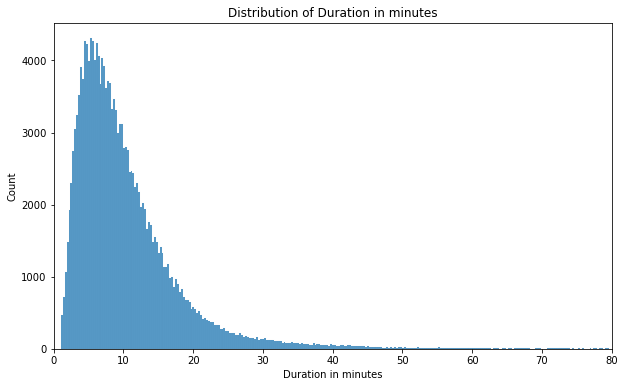

In [35]:
# Distribution of duration
plt.figure(figsize=(10,6))
x= trip_clean_df.duration_min
sb.histplot(x);
plt.title('Distribution of Duration in minutes');
plt.xlabel('Duration in minutes');
plt.xlim(0,80);

## Duration vs Age

We can see that bike duration seem to be dependent on age of users where increase in user age leads to decrease in bike duration. Most of the duration lie below _200 minutes_ and users having bike durations above _200 minutes_ have their ages between _19 and 72 years_. 


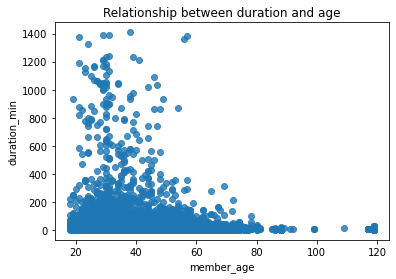

<Figure size 360x576 with 0 Axes>

In [36]:
# Relationship between user age and duration in minutes
sb.regplot(data = trip_clean_df, x='member_age', y='duration_min',
           x_jitter= 0.04, fit_reg=False)
plt.title('Relationship between duration and age');
plt.figure(figsize=(5,8));

## Duration vs. Gender

The relationship between duration and gender showed that only members in the other gender have their mean duration more than _15 minutes_. Members who are females have mean duration of _12.98 minutes_ whiles members who are males have mean duration of _11.2 minutes_.


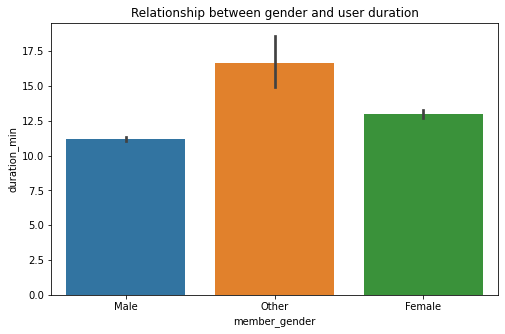

In [37]:
# Relationship between gender and user duration
plt.figure(figsize=(8,5))
x = trip_clean_df.member_gender
y = trip_clean_df.duration_min
sb.barplot(x=x ,y=y)
plt.title('Relationship between gender and user duration');

## Duration vs. User type

There are more subscribers than customers in the system. Even so, users who are customers turn to have high mean duration (_21.84 minutes_) than subscribers (_10.68 minutes_). This might imply that when users subscribe to the bikeshare system, it does not mean that they plan to have longer bike durations.

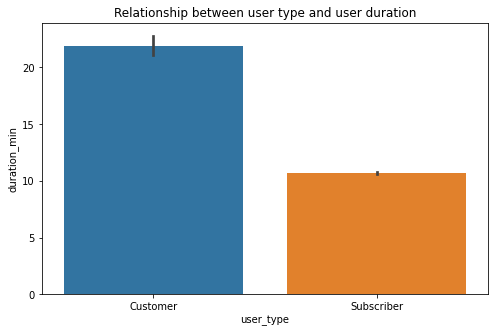

In [38]:
## # Relationship between user type and user duration
plt.figure(figsize=(8,5))
x = trip_clean_df.user_type
y = trip_clean_df.duration_min
sb.barplot(data=trip_clean_df, x=x ,y=y)
plt.title('Relationship between user type and user duration');

## Duration by member age and gender

The total number of points representing other gender is lesser than that of males and females.This shows that they are the least in terms of population in the bikeshare system. 
Only one member in the other gender has age more than _60 years_. I was surprised to have observed that two female users with ages of _56 an 57 years_ have more than _1200 minutes_ bike duration. This maybe as a result of not logging off after finnishing their ride.

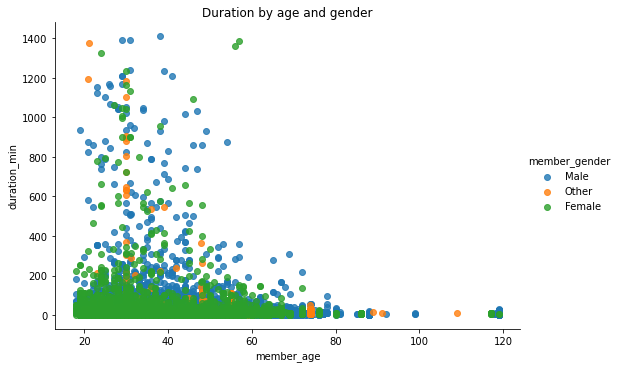

In [39]:
# Realationship between duration, age and gender
g = sb.FacetGrid(data = trip_clean_df, hue = 'member_gender', height = 5, aspect = 1.5)
g.map(sb.regplot, 'member_age', 'duration_min', x_jitter= 0.04, fit_reg=False)
g.add_legend();
plt.title('Duration by age and gender');

## Member age vs. Gender

There is a close relationship between the mean ages of males, females and other gender, they all have their mean ages between _33 and 36 years_.

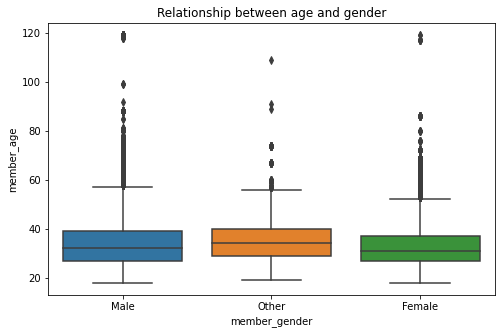

In [40]:
# Relationship between member age and gender
plt.figure(figsize=(8,5))
sb.boxplot(data = trip_clean_df, y='member_age', x = 'member_gender');
plt.title('Relationship between age and gender');

## Conclusion

From the data exploraton, we have seen that bike duration is dependent on age where increase in user age leads to decrease in bike duration. We have also observed that even though there are more subscribers than customers in the system, Users who are customers turn to have longer bike duration than subscribers. Therefore, we might say that when users subscribe to the bikeshare system, it does not mean that they will have longer duration. Also, despite other gender being the least members in terms of population, they actually have longer bike duration than males and females.

In [41]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 703194 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\marzu\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\marzu\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\marzu\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\marzu\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\marzu\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "